<a href="https://colab.research.google.com/github/FaizanKamal7/FaizanKamal7/blob/main/Advertising_Sales_Prediction_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.7.0+cpu



**Advertising Sales Dataset:**
# 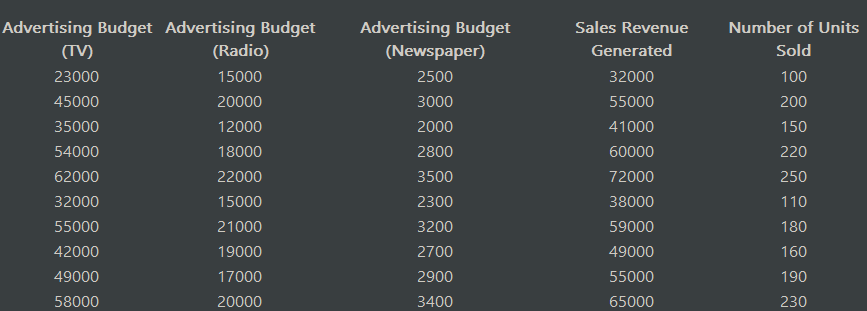

In [3]:
import numpy as np
import torch

In [104]:
# Each row represents a data point, and each column represents a feature (TV, Radio, Newspaper)
inputs = np.array([
    [23000, 15000, 2500],
    [45000, 20000, 3000],
    [35000, 12000, 2000],
    [54000, 18000, 2800],
    [62000, 22000, 3500],
    [32000, 15000, 2300],
    [55000, 21000, 3200],
    [42000, 19000, 2700],
    [49000, 17000, 2900],
    [58000, 20000, 3400]
], dtype=np.float32)  # Specify dtype as float32

# Define the target variable matrix as a NumPy array
# Each row corresponds to a data point, with the first column being "Sales Revenue" and the second column being "Units Sold"
targets = np.array([
    [32000, 100],
    [55000, 200],
    [41000, 150],
    [60000, 220],
    [72000, 250],
    [38000, 110],
    [59000, 180],
    [49000, 160],
    [55000, 190],
    [65000, 230]
], dtype=np.float32)  # Specify dtype as float32


In [105]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [106]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-1.7425, -1.8033, -0.2085],
        [ 0.8606, -0.2329,  0.1251]], requires_grad=True)
tensor([-0.0464, -1.3238], requires_grad=True)


In [107]:
def model(x):
    return x @ w.t() + b

In [108]:
preds = model(inputs)
print(preds)

tensor([[ -67646.5781,   16610.7207],
        [-115101.0781,   34441.1172],
        [ -83041.9922,   27573.6816],
        [-127134.9453,   42627.0078],
        [-148433.5469,   48667.4453],
        [ -83286.9609,   24330.7754],
        [-134370.5625,   42838.8750],
        [-108007.9141,   32054.8047],
        [-116640.2656,   38569.6094],
        [-137836.3750,   45678.5078]], grad_fn=<AddBackward0>)


In [109]:
def mse(t1,t2):
  diff = t1 - t2
  return torch.sum(diff * diff) / diff.numel()

In [110]:
loss = mse(preds,targets)
print(loss)

tensor(1.4926e+10, grad_fn=<DivBackward0>)


In [111]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-7.9346e+09, -3.0441e+09, -4.8121e+08],
        [ 1.7150e+09,  6.5167e+08,  1.0312e+08]])
tensor([-164750.0312,   35160.2539])


In [112]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    print(w)
    print(b)
    w.grad.zero_()
    b.grad.zero_()

tensor([[ 79344.0859,  30439.2383,   4811.8579],
        [-17148.9219,  -6516.8828,  -1031.0811]], requires_grad=True)
tensor([ 1.6011, -1.6754], requires_grad=True)


In [113]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(9.6371e+18, grad_fn=<DivBackward0>)


In [118]:
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
      w -= w.grad * 1e-5
      b -= b.grad * 1e-5
      w.grad.zero_()
      b.grad.zero_()

In [116]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(nan, grad_fn=<DivBackward0>)


In [117]:
print(preds)
print(targets)


tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], grad_fn=<AddBackward0>)
